In [50]:
import numpy as np
from helpers import *
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_h5_data()

In [52]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [53]:
layers_size = [12288,128, 64, 16, 4, 1]
parameters = deep_NN_model(train_x, train_y, layers_size, learning_rate=0.0075, n_iters=3000)

Cost after iteration 0: 0.689552


KeyboardInterrupt: 

In [32]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 1.0


In [33]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.78


Accuracy: 0.0
"non-cat" picture.


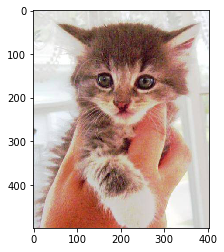

In [49]:
## START CODE HERE ##
my_image = "cat.100.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

fname = '/home/matt/work/dev/ml/datasets/cats_and_dogs/train/' + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ('\"' + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")